<a href="https://colab.research.google.com/github/rafaalawaji/Installing-the-package-arduino_robot_arm/blob/main/UberDataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset into data frame
df = pd.read_csv('UberDataset.csv')

#Part 1: Data Understanding and Exploration

In [3]:
# 1. Dataset Overview
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [4]:
# 2. Feature Description
print("\nFeature Description:")
print(df.describe())
print("\nColumns:", df.columns)


Feature Description:
             MILES
count  1155.000000
mean     10.566840
std      21.579106
min       0.500000
25%       2.900000
50%       6.000000
75%      10.400000
max     310.300000

Columns: Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')


In [5]:
# 3. Dataset Structure
print("\nDataset Structure:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Dataset Structure:
Rows: 1155, Columns: 7


In [6]:
# 4. Missing Values and Duplicates
print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows Count:")
print(df.duplicated().sum())


Missing Values:
START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

Duplicate Rows Count:
1


In [7]:
# 5. Statistical Summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
             MILES
count  1155.000000
mean     10.566840
std      21.579106
min       0.500000
25%       2.900000
50%       6.000000
75%      10.400000
max     310.300000


<Figure size 800x600 with 0 Axes>

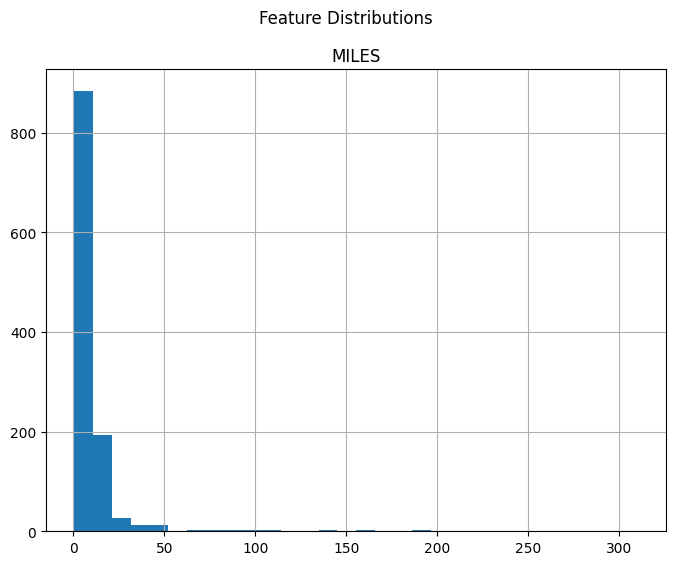

In [8]:
# 6. Data Distribution
plt.figure(figsize=(8, 6))
df.hist(bins=30, figsize=(8, 6))
plt.suptitle("Feature Distributions")
plt.show()

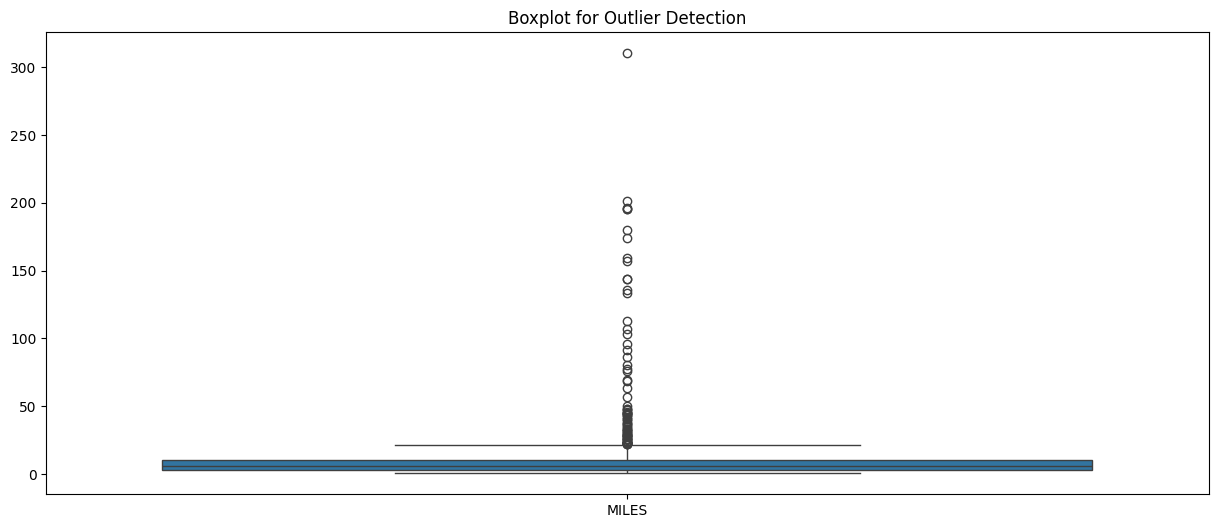

In [9]:
# 8. Outlier Detection using Boxplot
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 6))
sns.boxplot(data=numerical_df)
plt.title("Boxplot for Outlier Detection")
plt.show()

# Part 2: Data Preprocessing

In [10]:
# 9. Handling Missing Data by Dropping Rows
# Drop rows with any missing values
df_cleaned = numerical_df.dropna()

# Combine with non-numeric data after dropping missing values
df_cleaned = pd.concat([df_cleaned, df.select_dtypes(exclude=['number']).dropna()], axis=1)

# Check if any missing values remain
print("\nRemaining Missing Values After Dropping Rows:")
print(df_cleaned.isnull().sum())


Remaining Missing Values After Dropping Rows:
MILES         0
START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
PURPOSE       0
dtype: int64


In [11]:
# 10. Encoding Categorical Variables
label_encoder = LabelEncoder()
for col in df_cleaned.select_dtypes(include=['object']).columns: # Loop through each column that has the dt of obj
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col]) # Apply label encoding to the current column and replace the column with its encoded values

In [12]:
# 11. Feature Scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Part 3: Model Building and Visualization

In [13]:
# Reload the original data from the CSV or another data source
df_original = pd.read_csv('UberDataset.csv')  # Replace 'your_data.csv' with your actual data file

# Add start_time and end_time to the current DataFrame
df['START_DATE'] = df_original['START_DATE']
df['END_DATE'] = df_original['END_DATE']
df['Miles'] = df_original['MILES']
df['START'] = df_original['START']
df['STOP'] = df_original['STOP']

In [14]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'Miles'],
      dtype='object')

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical columns ('PURPOSE', 'CATEGORY', 'START', and 'STOP')
label_encoder = LabelEncoder()
df['Encoded_Purpose'] = label_encoder.fit_transform(df['PURPOSE'])
df['Encoded_Category'] = label_encoder.fit_transform(df['CATEGORY'])
df['Encoded_START'] = label_encoder.fit_transform(df['START'])
df['Encoded_STOP'] = label_encoder.fit_transform(df['STOP'])

# Prepare the feature matrix (X) and target vector (y)
X = df[['Encoded_Purpose', 'Encoded_Category', 'Encoded_START', 'Encoded_STOP']]
y = df['MILES']  # Updated target column name to match your DataFrame

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Model evaluation
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Squared Error: 422.46420942458565
R-squared Score: -0.004923512339916281


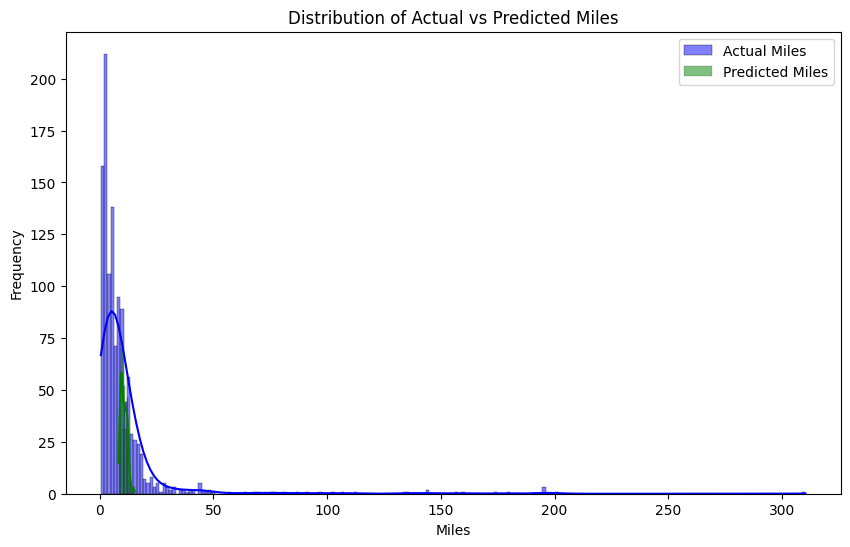

In [16]:
# 13. Visualization - Data Distribution of Actual and Predicted Miles
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color="blue", label="Actual Miles")
sns.histplot(y_pred, kde=True, color="green", label="Predicted Miles")
plt.title("Distribution of Actual vs Predicted Miles")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Feature Importance based on Model Coefficients:
            Feature  Importance
1  Encoded_Category    0.326338
3      Encoded_STOP    0.008178
2     Encoded_START   -0.003776
0   Encoded_Purpose   -0.566815


<ipython-input-17-c50591d1b3a9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


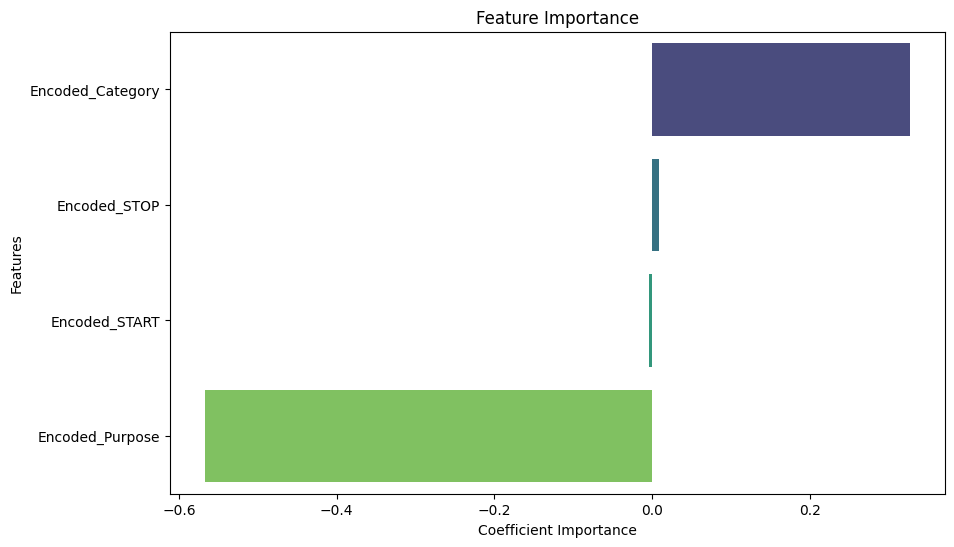

In [17]:
#14. Feature Importance (for linear regression coefficients)
# Linear regression coefficients indicate feature importance
coefficients = model.coef_
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": coefficients
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance based on Model Coefficients:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Coefficient Importance")
plt.ylabel("Features")
plt.show()

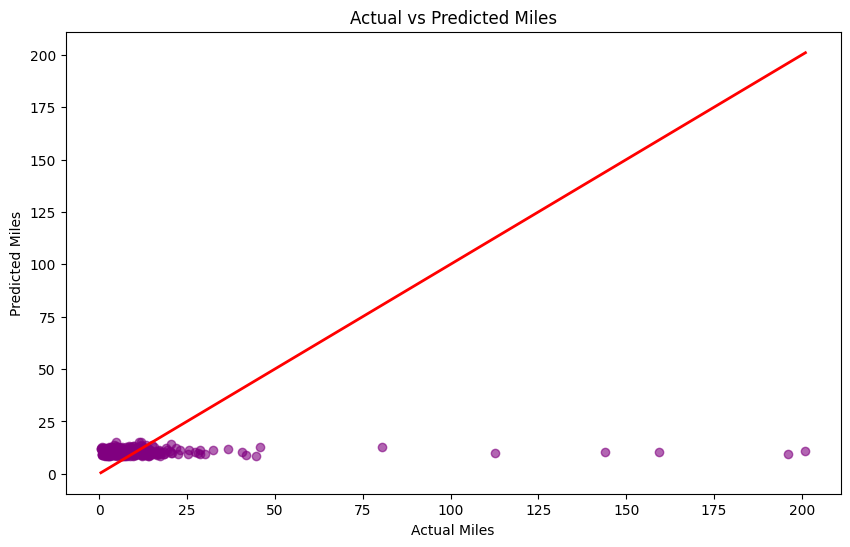

In [18]:
# 15. Model Performance Across Features
# Actual vs. Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line of perfect prediction
plt.title(f'Actual vs Predicted Miles')
plt.xlabel('Actual Miles')
plt.ylabel('Predicted Miles')
plt.show()

Analysis based on PURPOSE column

In [19]:
purpose_distribution = df['PURPOSE'].value_counts()
print("Purpose Distribution:")
print(purpose_distribution)

Purpose Distribution:
PURPOSE
Unkown             502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64


"Unknown" is the most frequent purpose, showing that a substantial portion of rides lack specific categorization or purpose information.

The main identified purposes include "Meeting," "Meal/Entertain," "Errand/Supplies," and "Customer Visit."

"Commute" and "Charity" purposes each appear only once.

In [20]:
descriptive_stats_by_purpose = df.groupby('PURPOSE')['MILES'].describe()
print("Descriptive Statistics on Miles Covered grouped by Purpose:")
print(descriptive_stats_by_purpose)

Descriptive Statistics on Miles Covered grouped by Purpose:
                 count        mean        std    min      25%     50%  \
PURPOSE                                                                 
Airport/Travel     3.0    5.500000   1.852026    4.1    4.450    4.80   
Between Offices   18.0   10.944444   8.458913    1.9    5.200   11.60   
Charity ($)        1.0   15.100000        NaN   15.1   15.100   15.10   
Commute            1.0  180.200000        NaN  180.2  180.200  180.20   
Customer Visit   101.0   20.688119  40.632891    0.8    5.200    7.90   
Errand/Supplies  128.0    3.968750   3.464619    0.5    1.800    3.10   
Meal/Entertain   160.0    5.698125   5.019690    0.6    2.775    4.25   
Meeting          187.0   15.247594  25.093394    0.7    7.900   10.00   
Moving             4.0    4.550000   1.181807    3.3    3.900    4.40   
Temporary Site    50.0   10.474000   7.757440    1.8    6.100    8.00   
Unkown           502.0    9.748008  19.590247    0.6    2.300   


Trips for "Meeting" and "Customer Visit" purposes have the highest average mileage, indicating generally longer trips for these purposes.
On the other hand, "Meal/Entertain" and "Errand/Supplies" show lower average mileage, suggesting shorter trips.
The purposes "Personal Use" and "Other" have the largest standard deviation, indicating more variability in trip distances for these categories.


Aggregated Data by Purpose:
            PURPOSE  Average Miles  Standard Deviation  Trip Count
0    Airport/Travel       5.500000            1.852026           3
1   Between Offices      10.944444            8.458913          18
2       Charity ($)      15.100000                 NaN           1
3           Commute     180.200000                 NaN           1
4    Customer Visit      20.688119           40.632891         101
5   Errand/Supplies       3.968750            3.464619         128
6    Meal/Entertain       5.698125            5.019690         160
7           Meeting      15.247594           25.093394         187
8            Moving       4.550000            1.181807           4
9    Temporary Site      10.474000            7.757440          50
10           Unkown       9.748008           19.590247         502


<ipython-input-21-5b5d1d36f29a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PURPOSE', y='Average Miles', data=aggregated_data, palette="viridis")


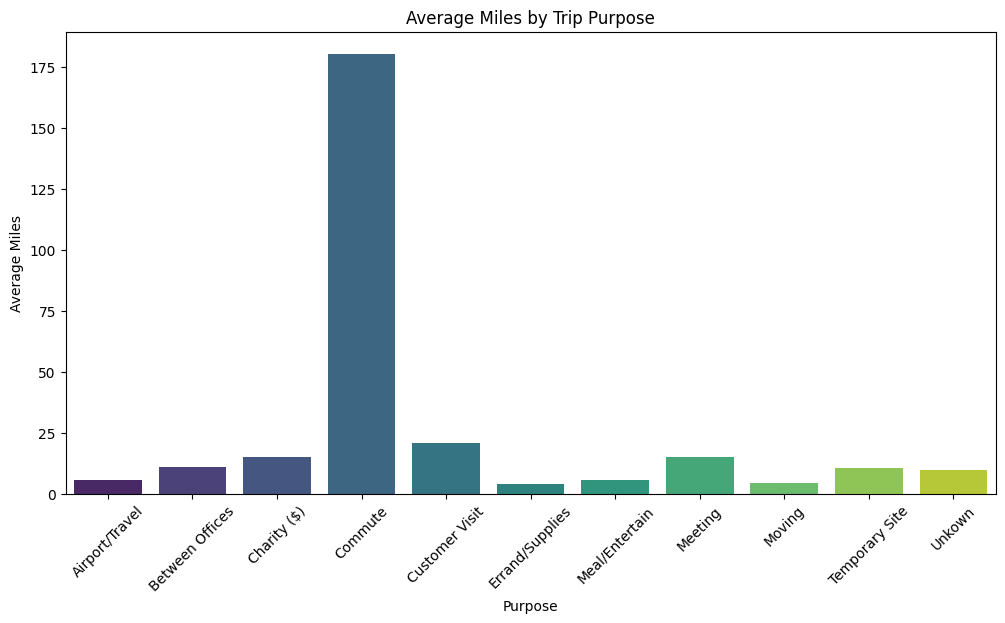

In [21]:
aggregated_data = df.groupby('PURPOSE')['MILES'].agg(['mean', 'std', 'count']).reset_index()
aggregated_data.rename(columns={'mean': 'Average Miles', 'std': 'Standard Deviation', 'count': 'Trip Count'}, inplace=True)

#display the aggregated data
print("\nAggregated Data by Purpose:")
print(aggregated_data)

# Visualize the aggregated data
plt.figure(figsize=(12, 6))
sns.barplot(x='PURPOSE', y='Average Miles', data=aggregated_data, palette="viridis")
plt.title("Average Miles by Trip Purpose")
plt.xlabel("Purpose")
plt.ylabel("Average Miles")
plt.xticks(rotation=45)
plt.show()


The results show that "Commute" has the highest average mileage, followed by "Customer Visit" and "Meeting," indicating these trips tend to cover longer distances. Most other purposes, like "Errand/Supplies" and "Meal/Entertain," involve shorter trips. "Unknown" is the most common purpose, with the largest number of trips recorded.

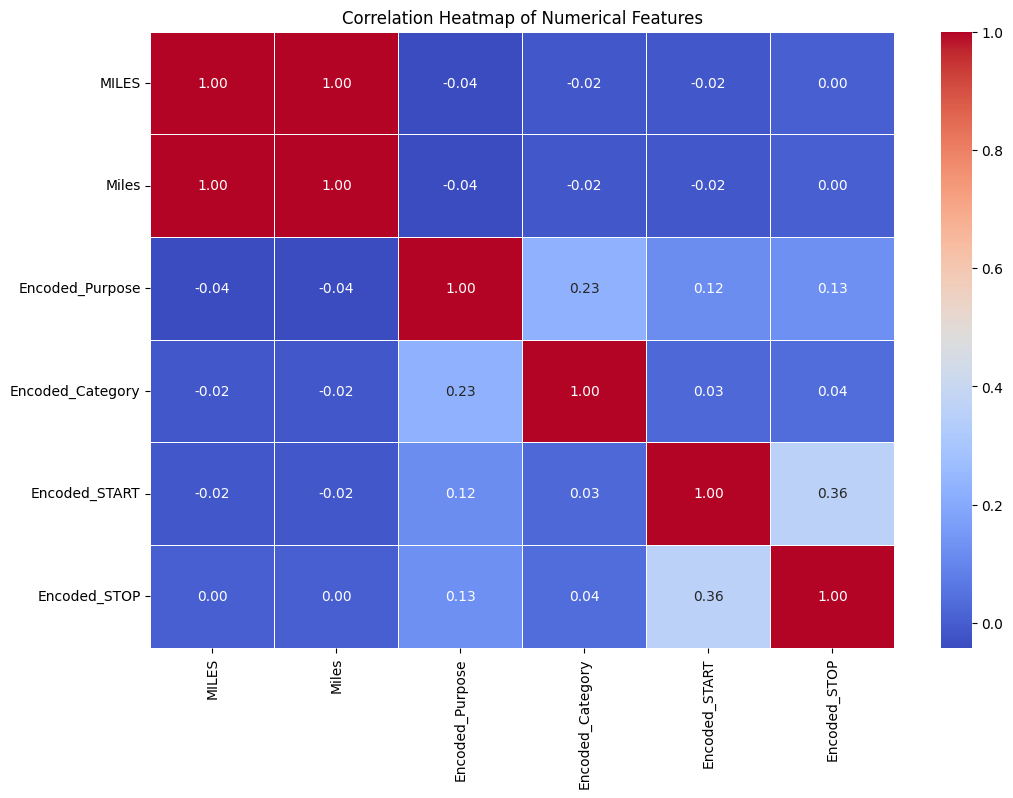

In [22]:
#Correlation Analysis: Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

The heatmap shows that most features have very weak or no connection to each other:
*   Encoded_START and Encoded_STOP have a moderate positive correlation of 0.36, meaning starting and stopping locations are somewhat related.
*   MILES has almost no correlation with any feature, with values around -0.02 to 0.00.
* Encoded_Purpose and Encoded_Category have a weak correlation of 0.23, showing a slight connection between trip purpose and category.


